### **For this assignment the only permitted libraries to use are Numpy, Scipy, MatplotLib and Pandas! All four have been imported for you in this Notebook.**

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


### Data loading

Train and Test sets can be found in the `Resources` folder. You can choose to visualize your data all at once, in windows, or only considering a subset of sensors to detect which ones would prove most useful to your analysis.
An example of such a visualization can be found in the following cell.

In [2]:
train_file_path = 'lab1_train.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')

# Convert Timestamp column to datetime
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')


In [3]:
test_file_path = 'lab1_test.csv'

test_data = pd.read_csv(test_file_path, delimiter=',')

# Convert Timestamp column to datetime
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

In [79]:
def visualize_sensor_data(df, window=None, sensors=None):
    # If window is None, visualize the entire dataset
    if window is None:
        start_index, end_index = 0, len(df)
    else:
        start_index, end_index = window

    # If sensors is None, select all sensor columns
    if sensors is None:
        sensors = df.columns[1:-1]

    # Plot each sensor in a different color
    plt.figure(figsize=(15, 8))
    for sensor in sensors:
        plt.plot(df['Timestamp'][start_index:end_index], df[sensor][start_index:end_index], label=sensor)

    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Values')
    plt.title('Sensor Data Visualization')
    #plt.legend()

    plt.show()
#window=(0, 1000),


### Familiarization

#### Are the signals correlated? Do they show cyclic behavior?

Yes, we can see that some signals are correlated, following almost the same pattern. For example, let's take a look at signals LIT301 LIT401, plotted below. We can see that they follow a similar pattern (overlapping in some cases), with values ranging from 750-1000.
The behavior shown by most continuous sensor values can be described as cyclic, with repeating values over time. For example, referring back to LIT301, we can see that every (approximately) hour and 15 minutes, the signal reads the same value.

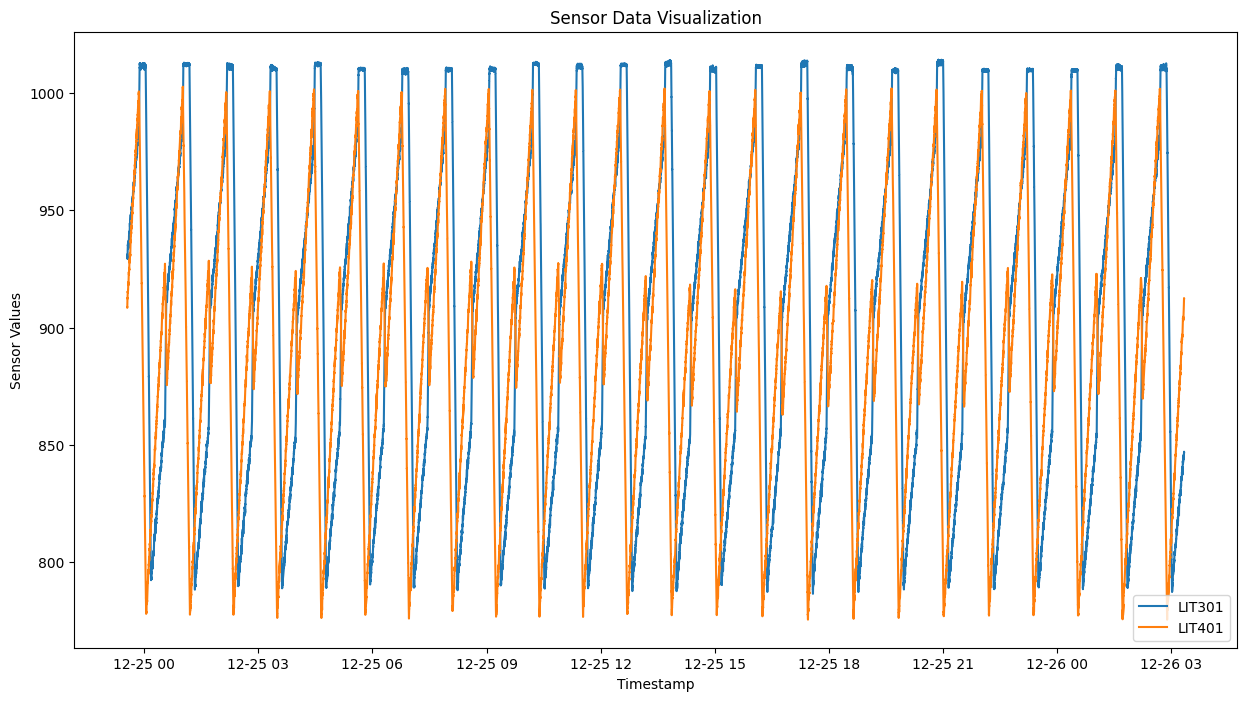

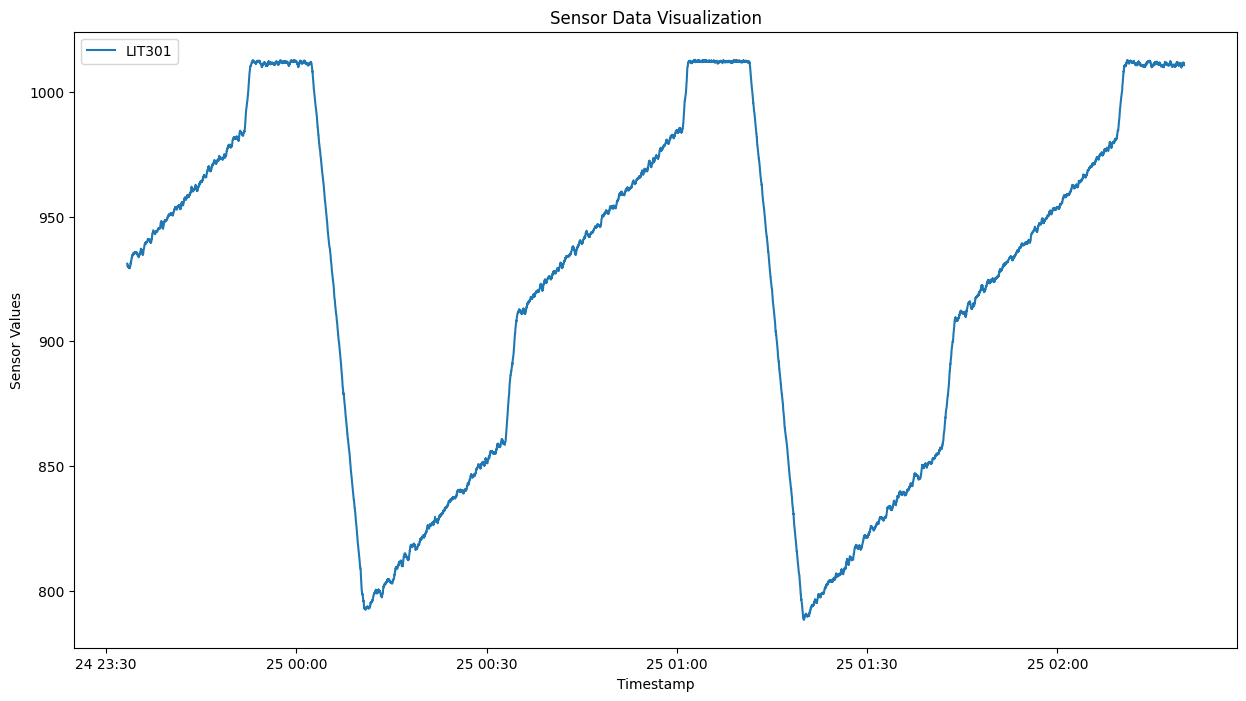

In [5]:
visualize_sensor_data(train_data, window=(200000,300000), sensors=["LIT301","LIT401"])
#visualize_sensor_data(train_data, window=(200000,300000))
visualize_sensor_data(train_data, window=(200000,210000), sensors=["LIT301"])
#visualize_sensor_data(train_data)


In [30]:
# visualize_sensor_data(train_data, window=(200000,204000),  sensors=['FIT101', 'LIT101'])
# visualize_sensor_data(train_data, window=(200000,204000),  sensors=['FIT101'])
#visualize_sensor_data(train_data, window=(200, 800), sensors=['FIT301'])
#visualize_sensor_data(train_data)
# visualize_sensor_data(test_data,window=(200000,204000), sensors=['FIT101', 'LIT101'])
# visualize_sensor_data(test_data, window=(200000,204000),  sensors=['FIT101'])
# 
# visualize_sensor_data(test_data, window=(200, 800), sensors=['FIT301'])

In [33]:
train_data

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,2015-12-28 09:59:55,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.855200,0.000128,1,1,1,Normal
496796,2015-12-28 09:59:56,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,Normal
496797,2015-12-28 09:59:57,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,Normal
496798,2015-12-28 09:59:58,2.428338,522.9252,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.81710,1.649953,189.502700,0.000128,1,1,1,Normal


In [72]:
test_data.columns

Index(['Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')

In [11]:
import pandas as pd
import numpy as np


def principal_component_analysis(df, k):
    eigenvectors = np.zeros(shape=(df.shape[1], k))
    df = df.values.T.astype(float)
    # zero-mean the data
    for i in range(df.shape[0]):
        # print(df[i])
        # print(np.mean(df[i]))
        df[i] = df[i] - np.mean(df[i])
        # print(df[i])

    # define covariance matrix
    # print(df)
    cov = 1 / df.shape[0] * df @ df.T

    evl, evec = np.linalg.eig(cov)
    # print(evec)
    # print(evec[:,0:k])
    d = {}
    #print(evec)
    for i in range(evl.size):
        d[evl[i]] = evec[:,i]
    evls = np.sort(np.unique(evl))[::-1]
    #print(d)
    for i in range(k):
        eigenvectors[:,i] = d[evls[i]]
    #print(eigenvectors)
    return eigenvectors  # eigenvectors
    

def apply_principal_component_analysis(df, eigenvectors):
    projected_data = np.zeros(shape=(df.shape[0], eigenvectors.shape[1]))
    means = np.zeros(df.shape[0])
    df = df.T.values.astype(float)
    for i in range(df.shape[0]):
        # print(df[i])
        # print(np.mean(df[i]))
        means[i] = np.mean(df[i])
        df[i] = df[i] - means[i]

    df = df.T
    projected_data = df@eigenvectors
    reprojected_data = projected_data@eigenvectors.T
    # reprojected_data = reprojected_data.T
    # for i in range(df.shape[1]):
    #     reprojected_data[i] = reprojected_data[i] + means[i]
    # reprojected_data = reprojected_data.T
    return pd.DataFrame(reprojected_data),pd.DataFrame(projected_data),pd.DataFrame(df)




In [7]:
import numpy as np

def dynamic_time_warping(a, b):
    n = len(a)
    m = len(b)

    distances_row_1 = np.zeros(m)
    distances_row_2 = np.zeros(m)

    distances_row_1[:] = np.cumsum((a[0] - b[:]) ** 2)

    for i in range(1, n):
        distances_row_2[0] = (a[i] - b[0]) ** 2 + distances_row_1[0]
        for j in range(1, m):
            distances_row_2[j] = (a[i] - b[j]) ** 2 + min(distances_row_2[j - 1], min(distances_row_1[j - 1], distances_row_1[j]))
        distances_row_1[:] = distances_row_2

    return np.sqrt(distances_row_1[m - 1])

# a bit faster (7s < 10s)


# def dynamic_time_warping(a, b):
#     n = a.size
#     m = b.size

#     distances = np.zeros((n, m))

#     for i, x in enumerate(a):
#         for j, y in enumerate(b):
#             distances[i, j] = (x - y) ** 2

#     for i in range(1, n):
#         distances[i, 0] += distances[i-1, 0]
#     for j in range(1, m):
#         distances[0, j] += distances[0, j-1]
#     for i in range(1, n):
#         for j in range(1,m):
#             distances[i, j] += min(distances[i-1, j-1], min(distances[i-1, j], distances[i, j-1]))

#     dtw_distance = np.sqrt(distances[n-1, m-1])
    
#     return dtw_distance

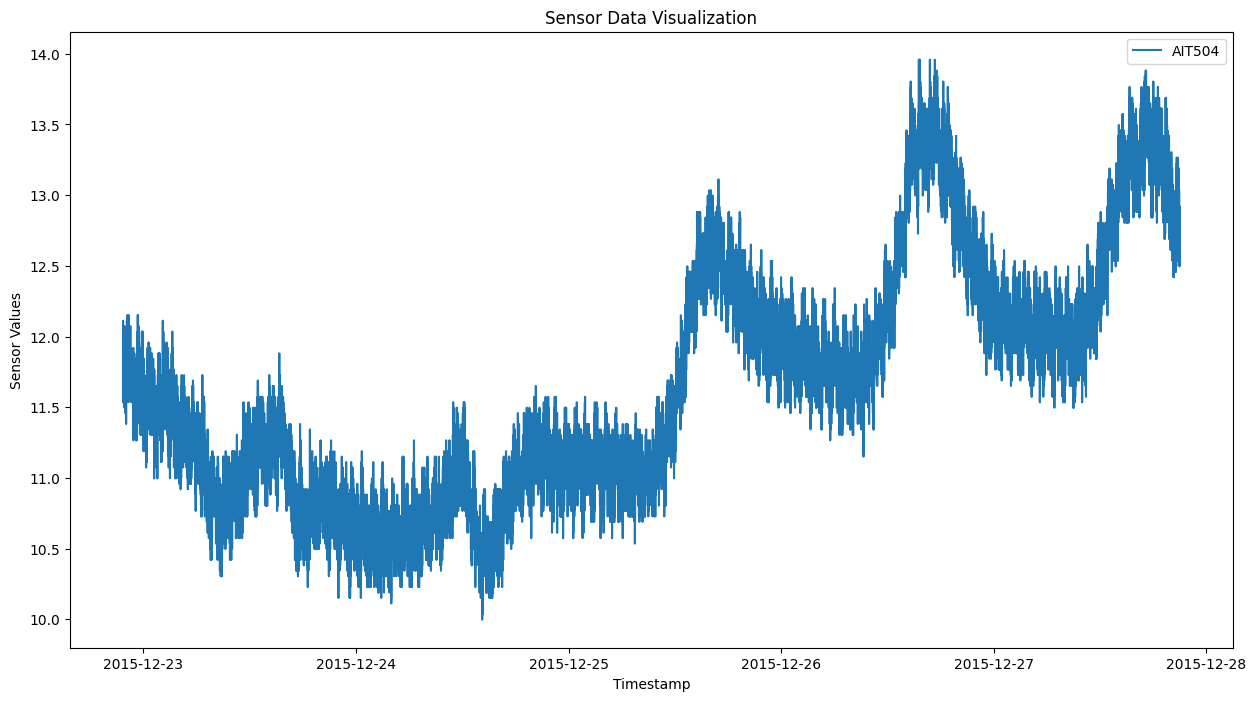

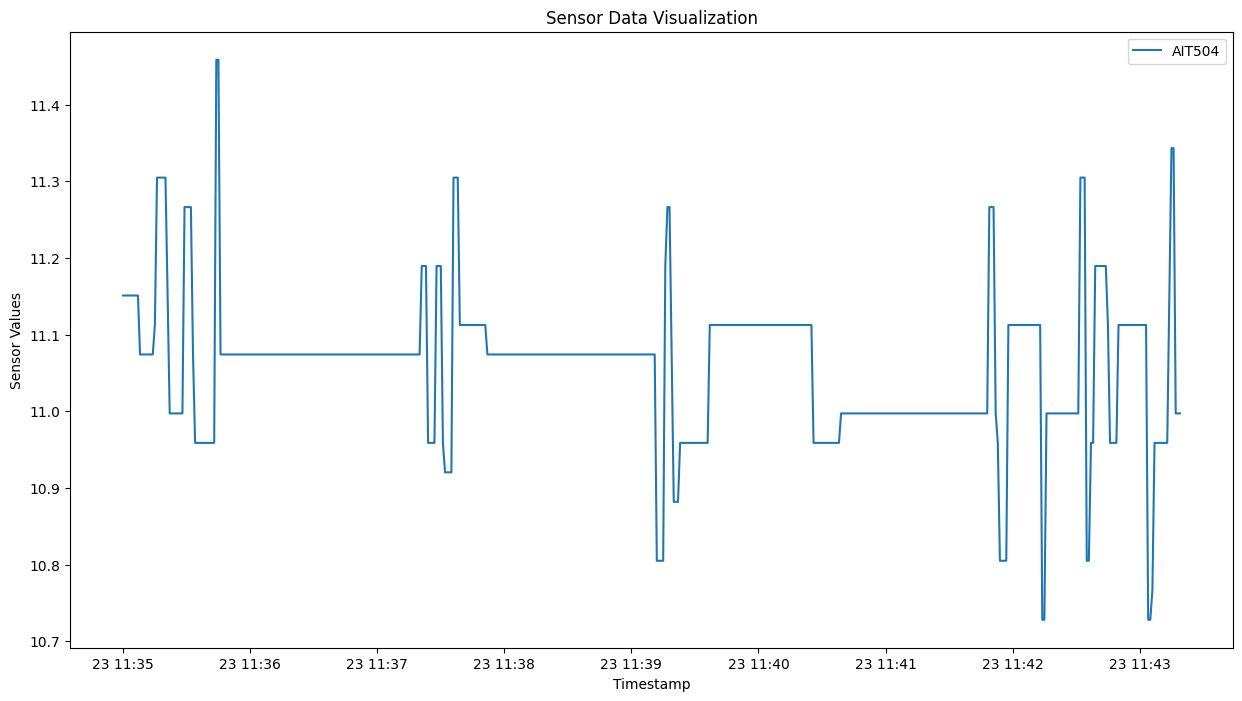

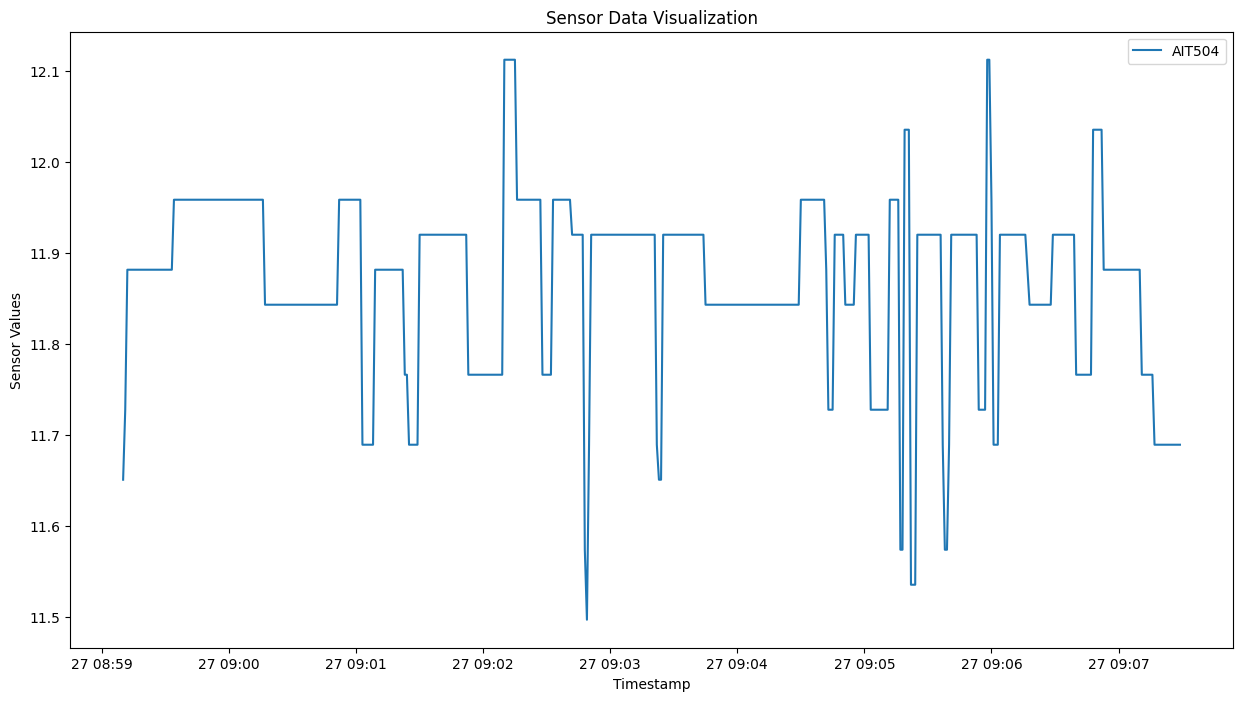

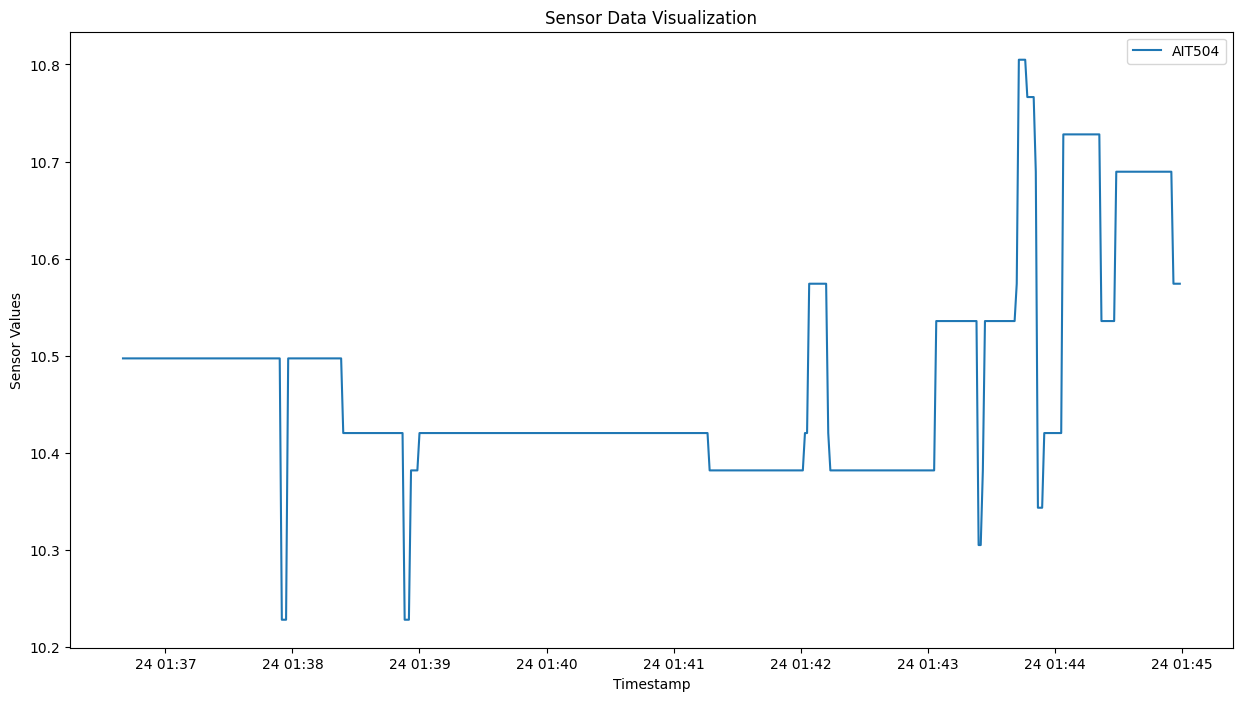

In [11]:
visualize_sensor_data(train_data, window=(20500,450000),sensors=['AIT504'])
visualize_sensor_data(train_data,  window=(70500,71000), sensors=['AIT504']) # window 1
visualize_sensor_data(train_data,  window=(406750,407250), sensors=['AIT504']) # window 2
visualize_sensor_data(train_data,  window=(121000,121500),   sensors=['AIT504']) #window 3

# visualize_sensor_data(train_data, window=(10000,400000), sensors=['AIT504']) #window 3
# visualize_sensor_data(test_data, window=(10000,400000), sensors=['AIT504']) #window 3



#visualize_sensor_data(test_data, window=( 115_000, 117_000), sensors=['AIT504']) #window 3



# visualize_sensor_data(train_data,  window=(181000,181500),   sensors=['MV101']) #window 4
# visualize_sensor_data(train_data,  window=(205000,205500),   sensors=['MV101']) #window 5
# visualize_sensor_data(train_data,  window=(339000,339500), sensors=['MV101']) #window 6
# visualize_sensor_data(train_data,  window=(433000,433500),   sensors=['MV101']) #window 7
aitTraining = train_data["AIT504"].values
aitTest = test_data['AIT504'].values
windows = np.array([
            aitTraining[70500:71000],
           aitTraining[406750:407250],
           aitTraining[121000:121500]
           ])
litTraining = train_data["LIT101"].values
# thresholds =np.zeros(windows.shape[0])
# for i, arr in enumerate(windows):
#     #print(arr)
#     thresholds[i]=np.std(arr)
# print(windows)
# print(thresholds)
#visualize_sensor_data(train_data,   sensors=['MV101'])
#visualize_sensor_data(test_data,   sensors=['LIT101'])
# visualize_sensor_data(train_data,  window=(70500,73500), sensors=['LIT101']) # window 1
# visualize_sensor_data(train_data,  window=(75500,78500), sensors=['LIT101']) # window 2
# visualize_sensor_data(train_data,  window=(122700,125700),   sensors=['LIT101']) #window 3
# visualize_sensor_data(train_data,  window=(181700,184700),   sensors=['LIT101']) #window 4
# visualize_sensor_data(train_data,  window=(206000,209000),   sensors=['LIT101']) #window 5
# visualize_sensor_data(train_data,  window=(330000,333000), sensors=['LIT101']) #window 6
# visualize_sensor_data(train_data,  window=(433500,436500),   sensors=['LIT101']) #window 7

#visualize_sensor_data(test_data, window=(220000,245000),  sensors=['LIT101'])


In [41]:
#anomaly
#14937.561222407216

#non-anomaly
#1768.9279523416833

100%|██████████| 50/50 [00:32<00:00,  1.54it/s]


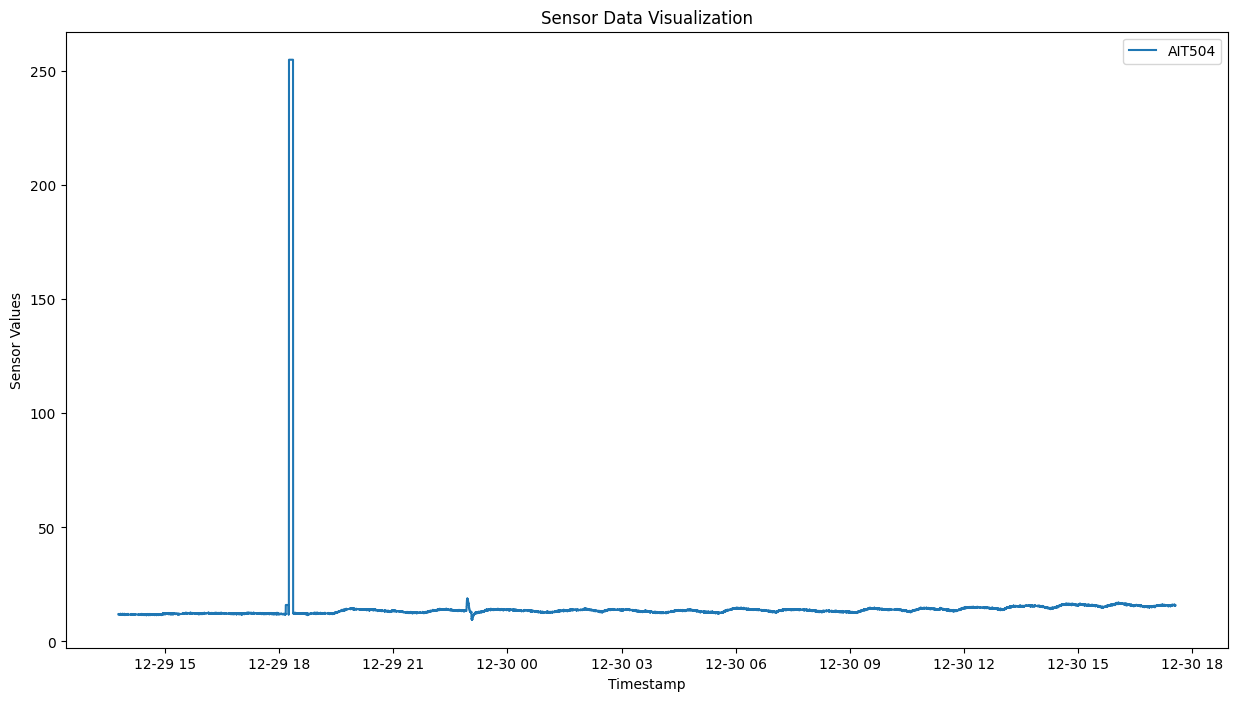

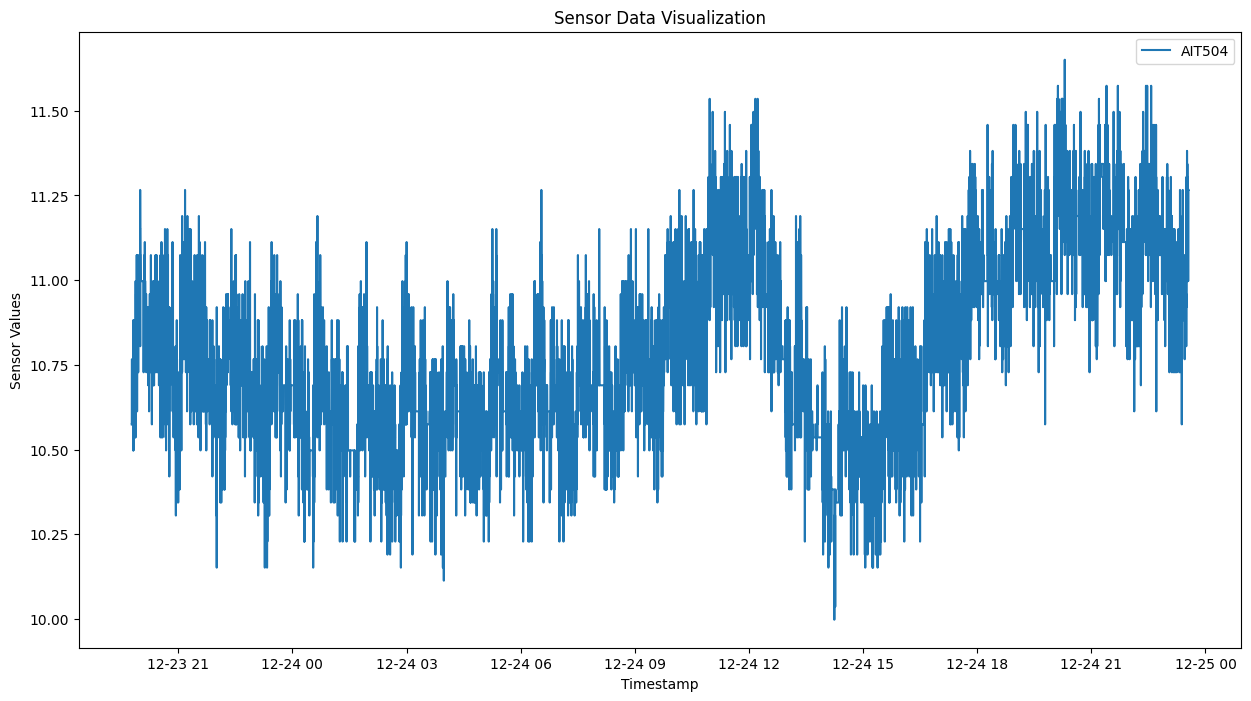

 16%|█▌        | 81/500 [00:53<04:43,  1.48it/s]

ANOMALY 116000
ANOMALY 116200


 17%|█▋        | 83/500 [00:55<04:40,  1.48it/s]

ANOMALY 116400


 17%|█▋        | 85/500 [00:56<04:46,  1.45it/s]

ANOMALY 116600


100%|██████████| 500/500 [07:53<00:00,  1.05it/s]


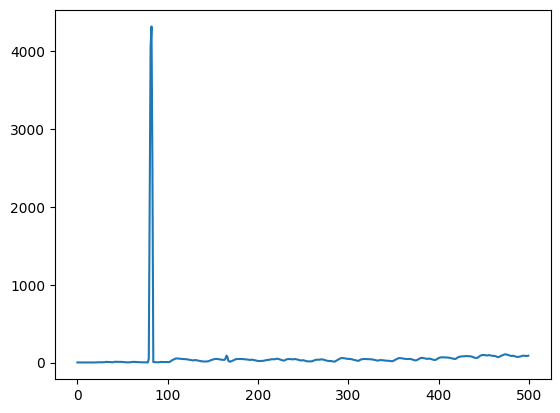

In [15]:
import random
res = []
for i in tqdm(range(50)):
    rng = random.randint(40000,450000)
    temp = np.zeros(3)
    for k ,arr in enumerate(windows):
        temp[k] = dynamic_time_warping(arr,aitTest[rng-200:rng+200])     
    res.append(np.amin(temp))
res = np.array(res)

# print(np.mean(res))


# visualize_sensor_data(test_data, window=(270000,290000),   sensors=['LIT101'])
trhld = np.amax(res)
res=[]
visualize_sensor_data(test_data, window=(100_000,200_000),   sensors=['AIT504'])
visualize_sensor_data(train_data, window=(100_000,200_000),   sensors=['AIT504'])

for i in tqdm(range(100_000, 200_000, 200)):
    temp = np.zeros(3)
    for k ,arr in enumerate(windows):
        temp[k] = dynamic_time_warping(arr,aitTest[i-200:i+200])
    if(np.amin(temp)>trhld):
        print("ANOMALY",i)
    res.append(np.amin(temp))

plt.plot(res)


124.16869253493931


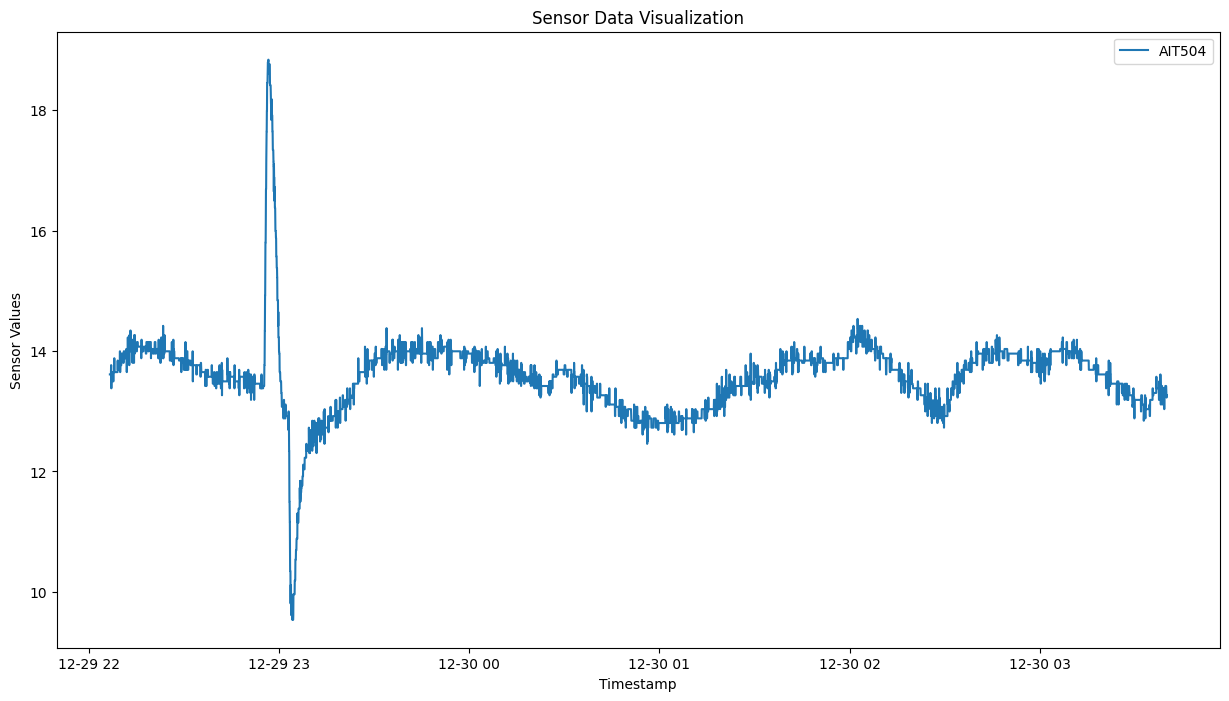

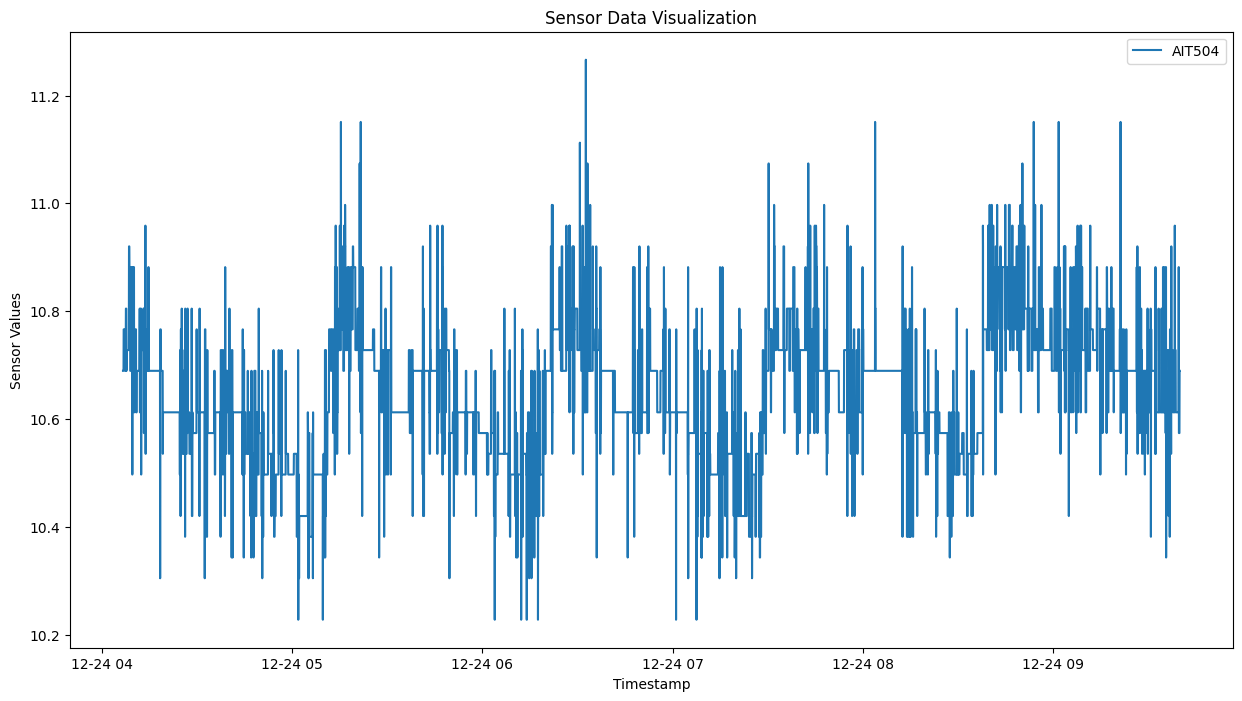

In [204]:
print(trhld)
visualize_sensor_data(test_data, window=(130_000,150_000),   sensors=['AIT504'])
visualize_sensor_data(train_data, window=(130_000,150_000),   sensors=['AIT504'])


In [205]:
# ▄▄▄▄▄▄▄▄▄▄▄▄▄▄
# █▀▄▄▀█▀▄▀█░▄▄▀
# █░▀▀░█░█▀█░▀▀░
# █░█████▄██▄██▄
# ▀▀▀▀▀▀▀▀▀▀▀▀▀▀


In [97]:
#visualize_sensor_data(train_data,sensors=["FIT401"])
#temp = train_data["FIT401"]
temp = train_data.values
#print(temp.shape)
temp = temp[:, 1:-1]
#print(temp.shape)
temp = pd.DataFrame(temp)


eig = principal_component_analysis(temp,5)
reprojData,projData,normData = apply_principal_component_analysis(temp,eigenvectors=eig)
temp = temp.T



<Axes: >

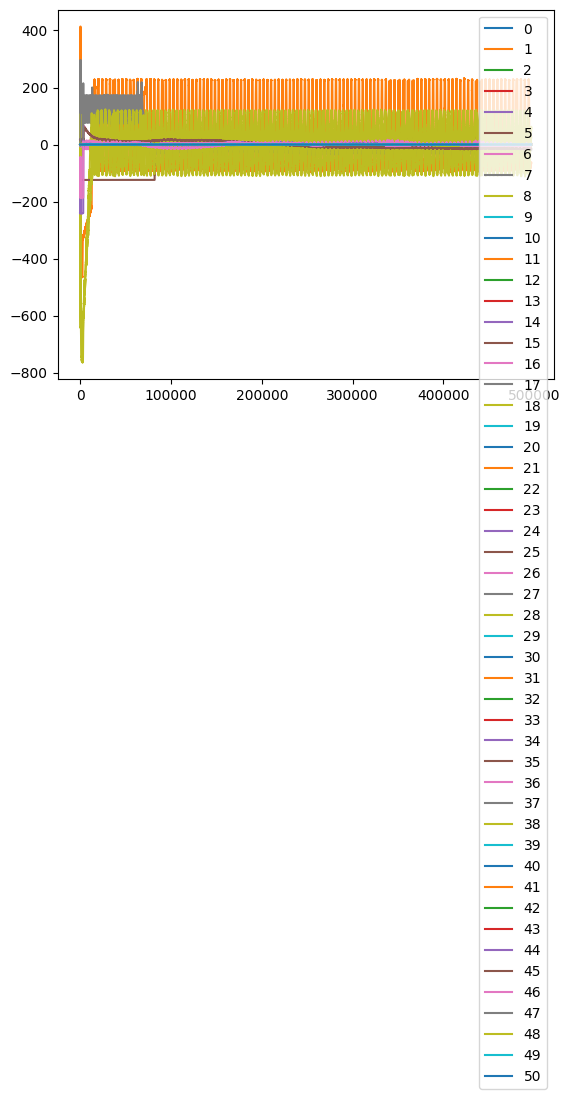

In [63]:
reprojData.plot()

C:\Users\andrei\PycharmProjects\pythonProject4\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


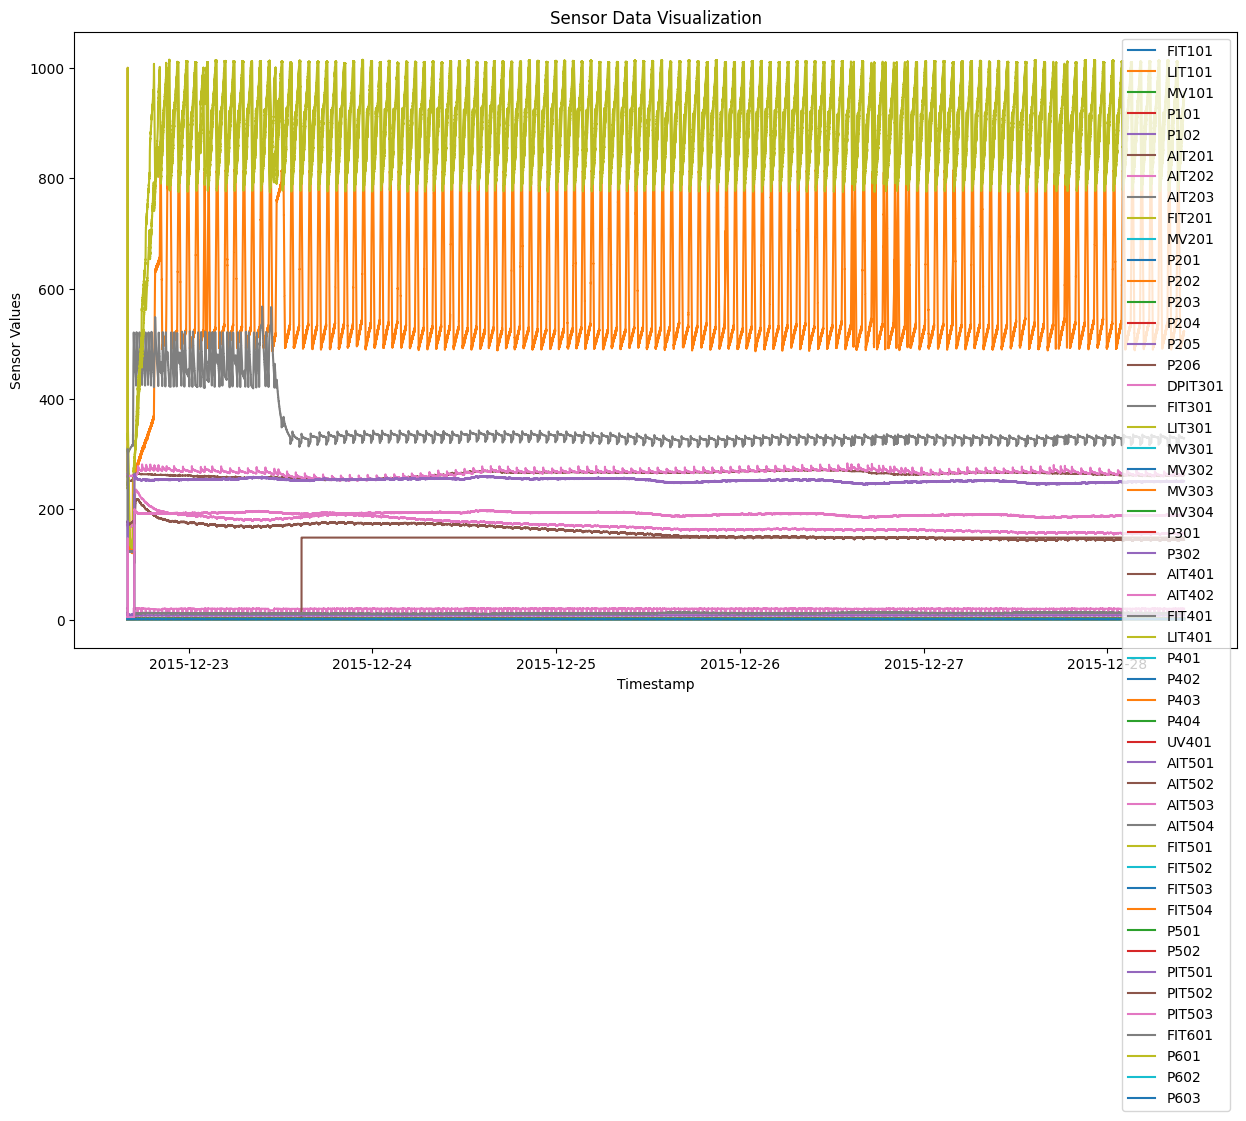

In [13]:
visualize_sensor_data(df=train_data)

<Axes: >

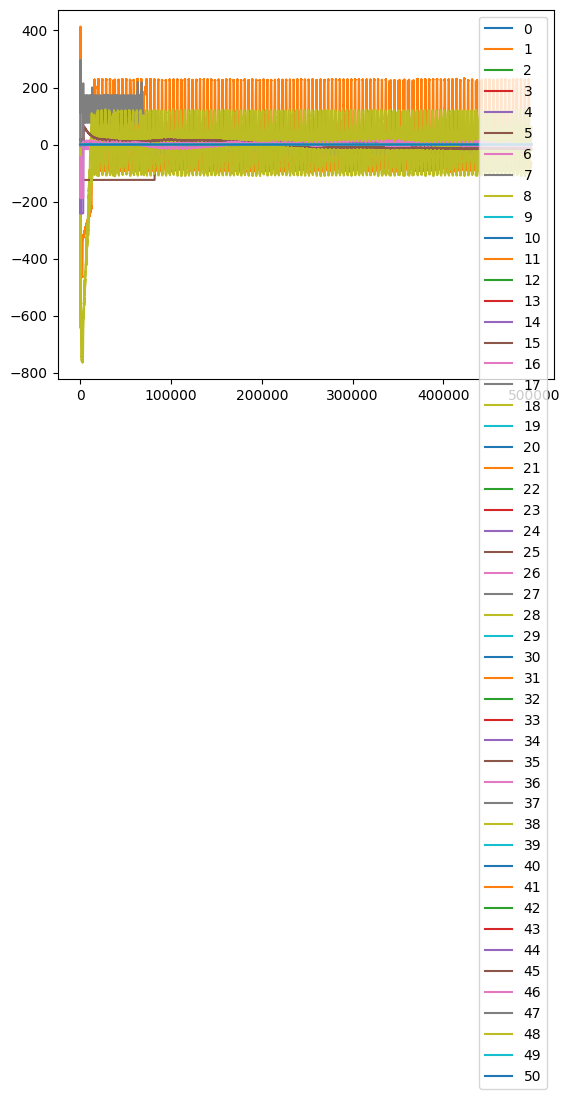

In [13]:
normData.plot()


<Axes: >

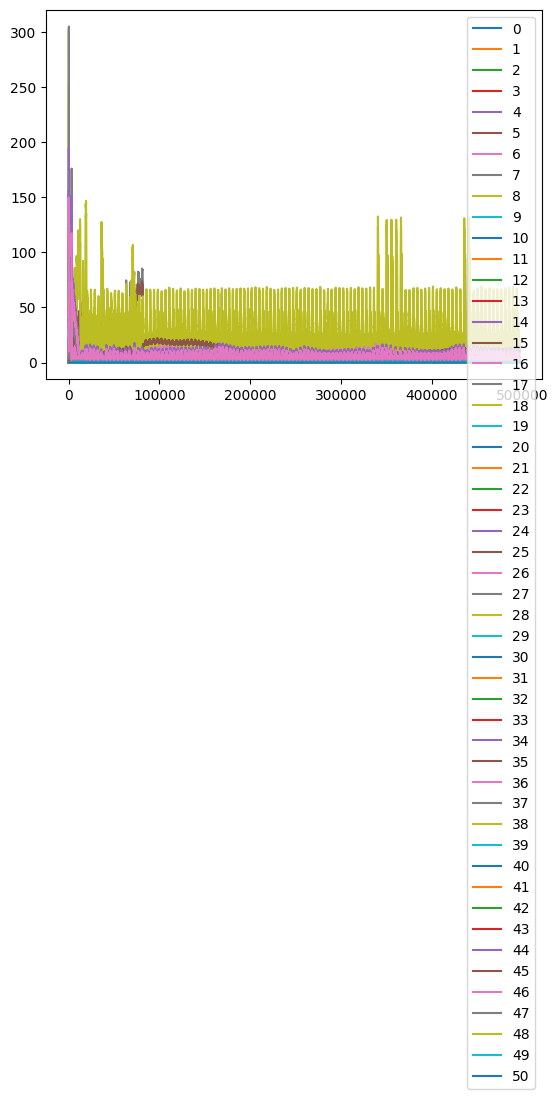

In [75]:
baz = abs(reprojData-normData)
#baz = np.sqrt()
baz.plot()

In [109]:
xyz = np.zeros(baz.shape[0])
for i in tqdm(range(baz.shape[0])):
    xyz[i] = np.mean((reprojData.iloc[i]-normData.iloc[i])**2)


100%|██████████| 496800/496800 [00:57<00:00, 8632.27it/s]


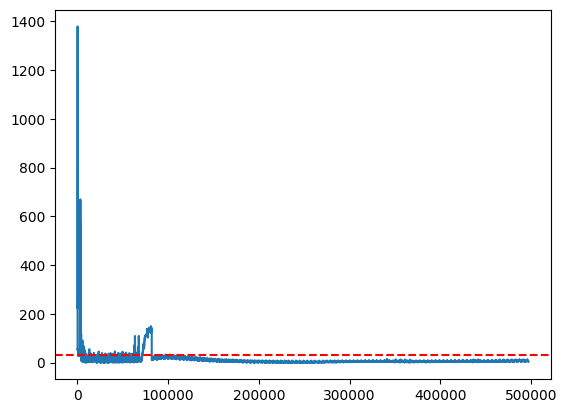

In [122]:
#print(baz.shape[0])
plt.plot(xyz)
plt.axhline(y=30,color='red',linestyle='--')

In [120]:
indices = []
for i in range(baz.shape[0]):
    # flag = False
    # for x in baz.iloc[i]:
    #     if x>60:
    #         flag=True
    #         break
    # if not flag:
    #     indices.append(i)
    if xyz[i]<30:
        indices.append(i)

bobo = train_data.iloc[indices]



#visualize_sensor_data(bobo)
        

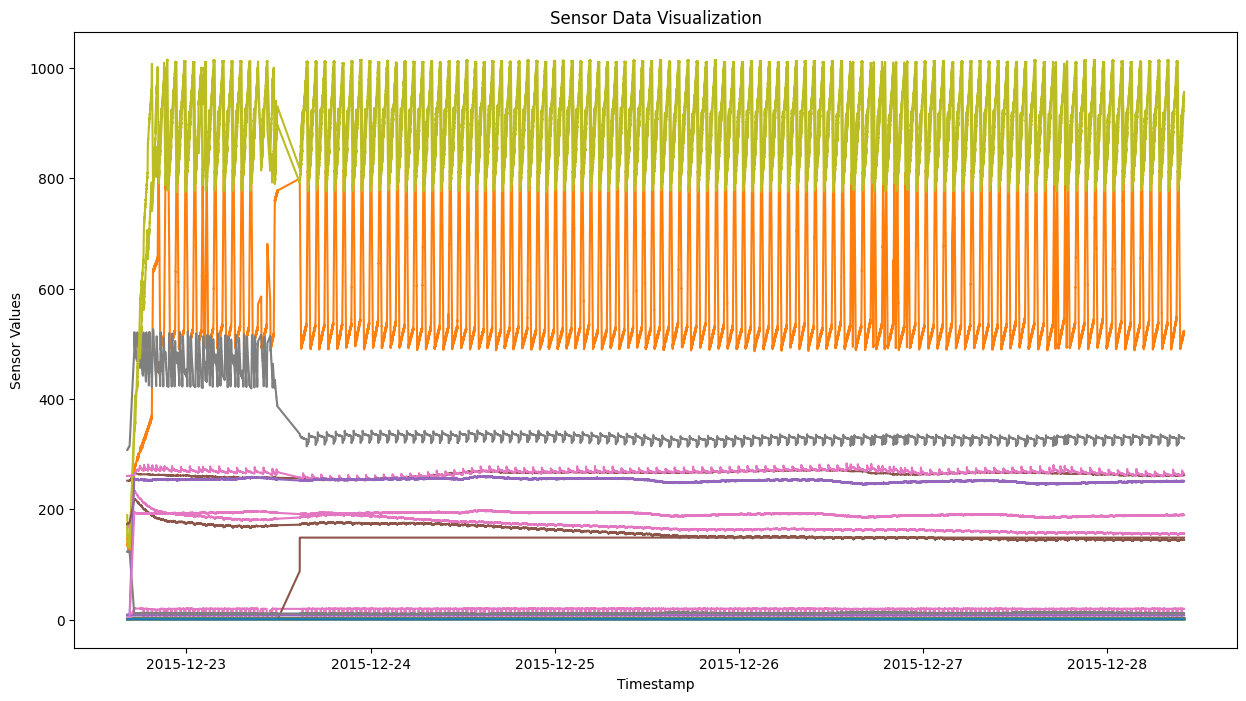

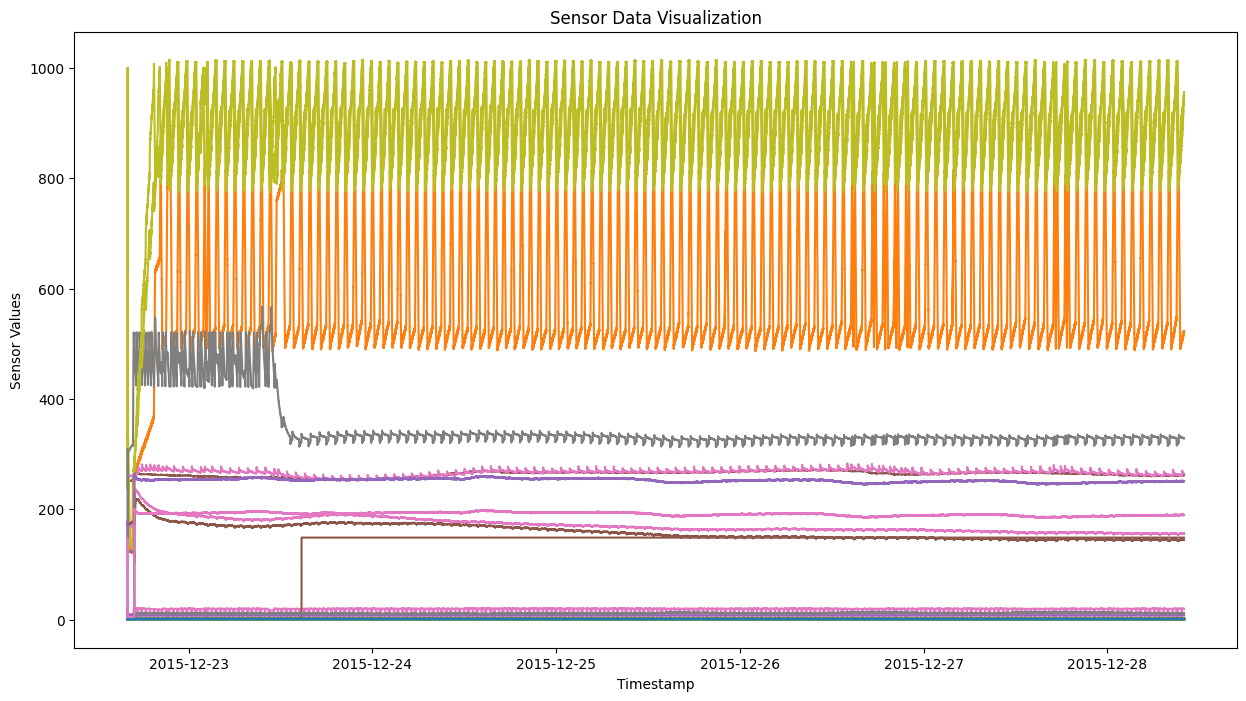

In [121]:
visualize_sensor_data(bobo)
visualize_sensor_data(train_data)

In [58]:
bobo

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
10313,2015-12-22 18:51:53,2.431861,341.6953,2,2,1,263.4901,8.377211,484.4142,2.471663,...,2,1,252.8839,1.585878,192.1623,0.000256,1,1,1,Normal
10314,2015-12-22 18:51:54,2.424815,341.8130,2,2,1,263.4901,8.377211,484.4142,2.471663,...,2,1,252.8839,1.585878,192.1623,0.000256,1,1,1,Normal
10315,2015-12-22 18:51:55,2.424815,341.8130,2,2,1,263.4901,8.377211,484.4142,2.471663,...,2,1,252.8839,1.585878,192.1623,0.000256,1,1,1,Normal
10321,2015-12-22 18:52:01,2.640041,343.3046,2,2,1,263.4901,8.379454,484.0041,2.473585,...,2,1,252.9800,1.569859,192.3065,0.000256,1,1,1,Normal
10322,2015-12-22 18:52:02,2.657016,343.4616,2,2,1,263.4901,8.379454,483.8759,2.473585,...,2,1,252.9640,1.569859,192.3065,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,2015-12-28 09:59:55,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.8171,1.778105,189.8552,0.000128,1,1,1,Normal
496796,2015-12-28 09:59:56,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.8171,1.778105,189.5027,0.000128,1,1,1,Normal
496797,2015-12-28 09:59:57,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,...,2,1,250.8171,1.778105,189.5027,0.000128,1,1,1,Normal
496798,2015-12-28 09:59:58,2.428338,522.9252,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8171,1.649953,189.5027,0.000128,1,1,1,Normal


In [211]:

test_without_ts = test_data.values
#print(temp[0:4,1:-1])
#print(temp.shape)
test_without_ts = test_without_ts[:, 1:-1]
#print(temp)
#print(temp.shape)
test_without_ts = pd.DataFrame(test_without_ts)

train_without_anos = bobo.values
train_without_anos = train_without_anos[:, 1:-1]
train_without_anos = pd.DataFrame(train_without_anos)


eig = principal_component_analysis(train_without_anos,5)
reprojData,projData,normData = apply_principal_component_analysis(test_without_ts,eigenvectors=eig)

<Axes: >

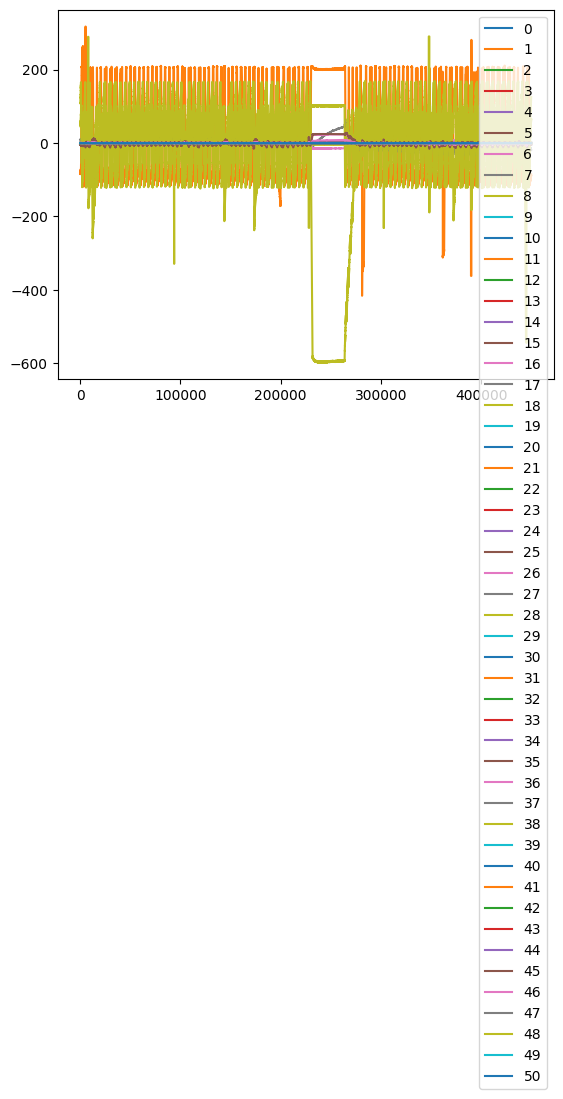

In [213]:
reprojData.plot()

<Axes: >

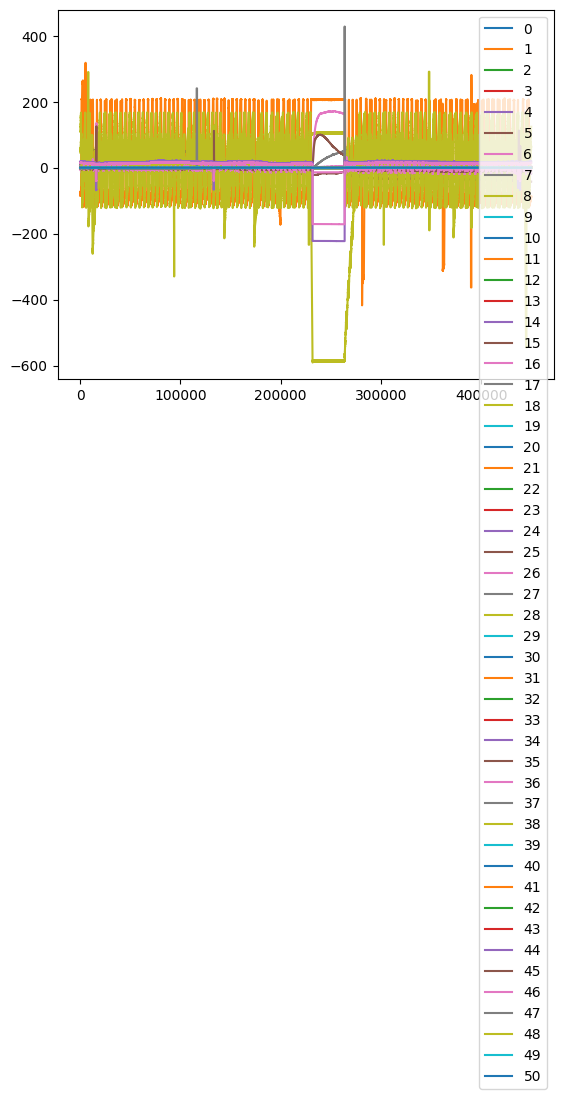

In [214]:
normData.plot()

In [215]:
banana = np.zeros(reprojData.shape[0])
for i in tqdm(range(reprojData.shape[0])):
    banana[i] = np.mean((reprojData.iloc[i]-normData.iloc[i])**2)


100%|██████████| 449919/449919 [00:52<00:00, 8640.38it/s]


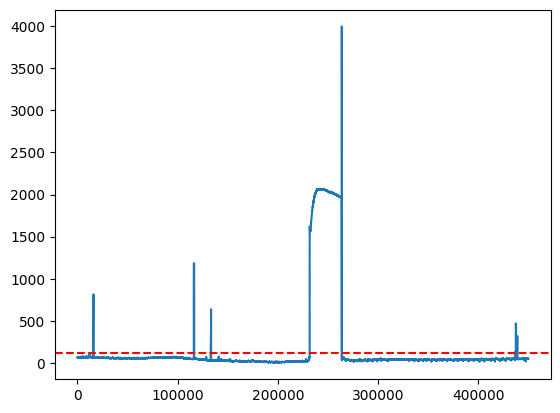

In [220]:
plt.plot(banana)
plt.axhline(y=120,color='red',linestyle='--')

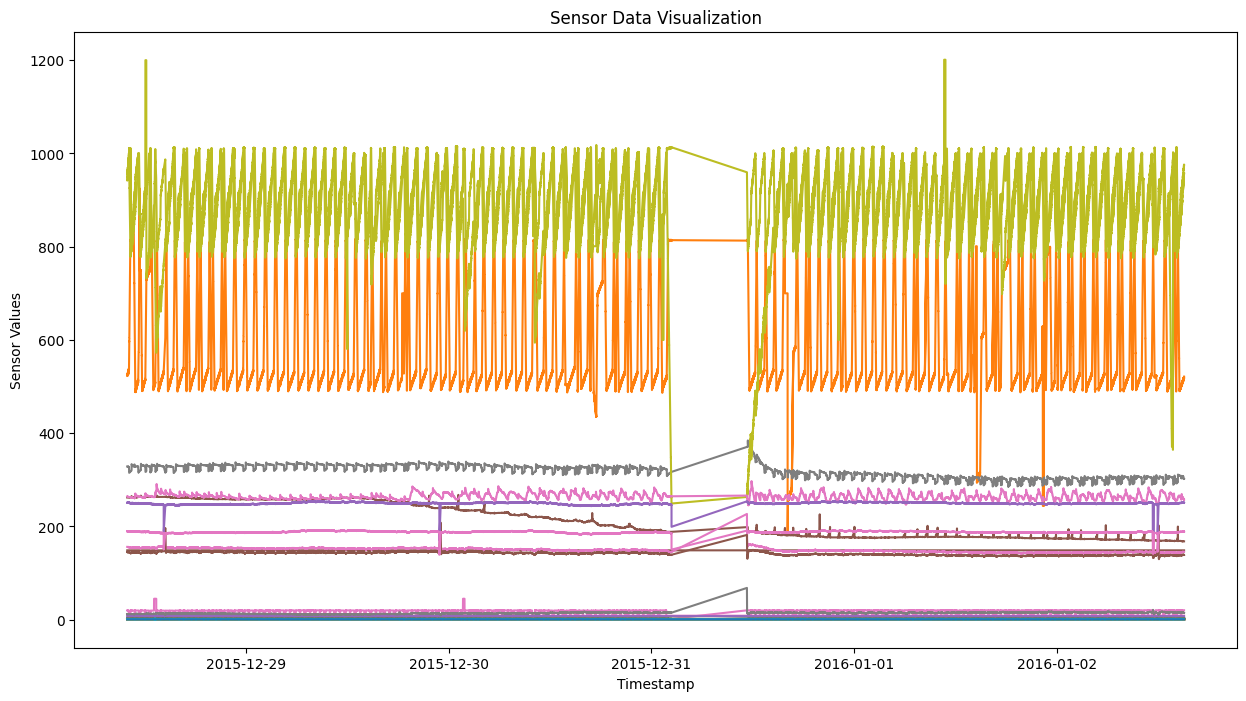

In [223]:
indices = []
for i in range(normData.shape[0]):
    # flag = False
    # for x in baz.iloc[i]:
    #     if x>60:
    #         flag=True
    #         break
    # if not flag:
    #     indices.append(i)
    if banana[i]<120:
        indices.append(i)

bobona = test_data.iloc[indices]



visualize_sensor_data(bobona)

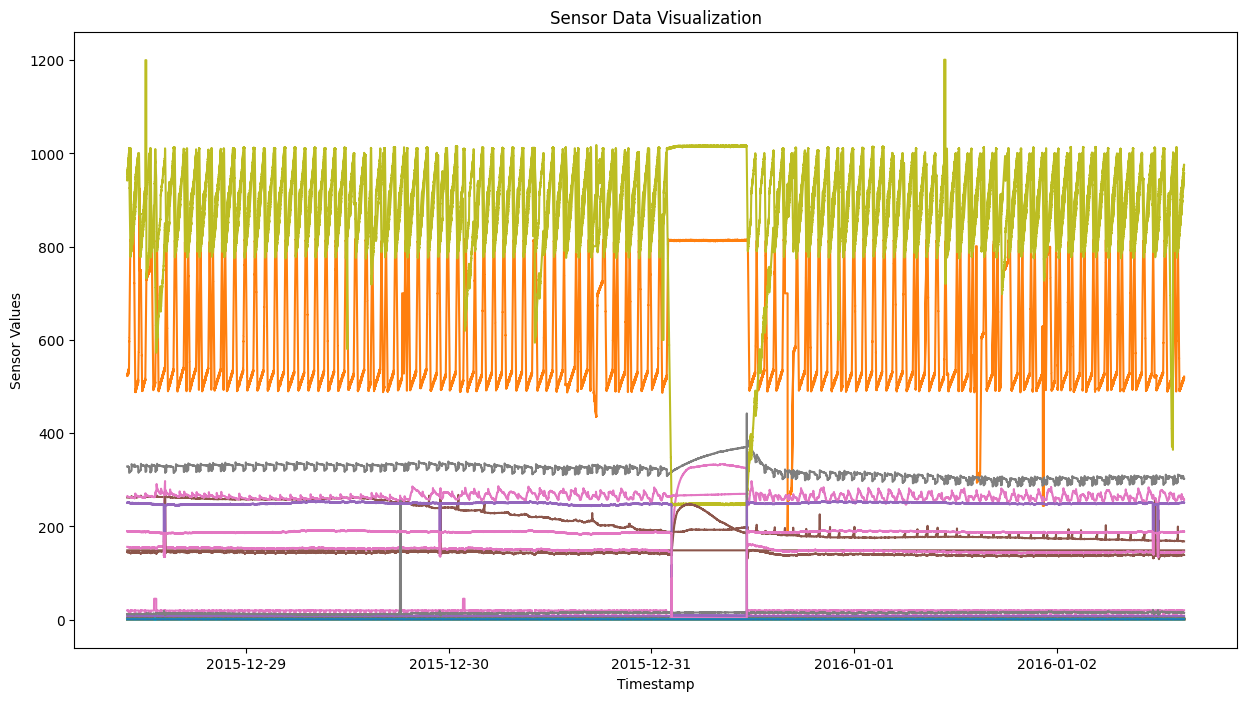

In [224]:
visualize_sensor_data(test_data)

# What kinds of anomalies can PCA detect?

PCA can be used to detect point anomalies, as outliers cause higher variance and can be easily detected from reprojected data.

In [ ]:
# TODO run for various instances of k (no of principal components) and compare performance